## Image Inpainting

In [1]:
import numpy as np
import torch, cv2
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
from diffusers import StableDiffusionInpaintPipeline

In [3]:
inpainting_model = "runwayml/stable-diffusion-inpainting"
pipe = StableDiffusionInpaintPipeline.from_pretrained(inpainting_model, torch_dtype=torch.float32)

vae/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
pipe.enable_attention_slicing()
pipe.enable_vae_slicing()
pipe.enable_vae_tiling()

In [5]:
pipe.to("mps")

StableDiffusionInpaintPipeline {
  "_class_name": "StableDiffusionInpaintPipeline",
  "_diffusers_version": "0.27.2",
  "_name_or_path": "runwayml/stable-diffusion-inpainting",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [6]:
# Let's define a function to create a boolean mask out of image
def create_boolean_mask(mask):
    mask = mask[:, :, 0]
    for i in range(len(mask)):
        for j in range(len(mask[i])):
            if mask[i][j] != 0:
                mask[i][j] = 255
    return mask

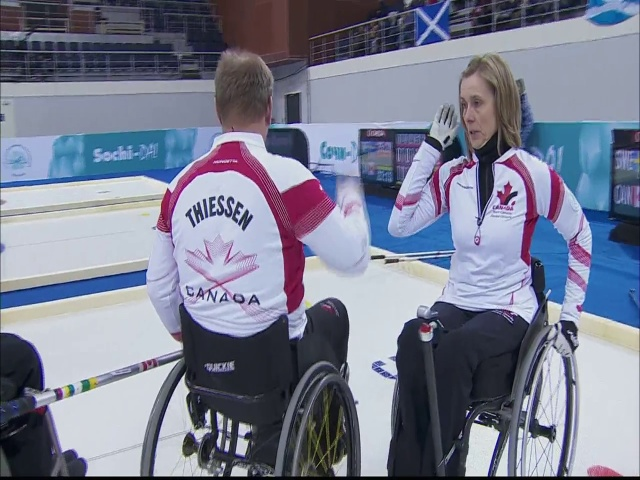

In [7]:
img_path = './images/sports/images/005808361.jpg'
img = cv2.imread(img_path)
img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
img

In [9]:
mask_path = './images/sports/bg_mask/005808361.png'
mask = cv2.imread(mask_path)
mask.shape

(480, 640, 3)

((480, 640, 3), dtype('uint8'), <matplotlib.image.AxesImage at 0x2e93f5b70>)

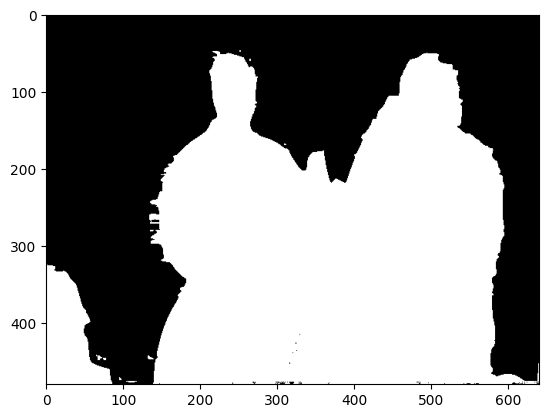

In [10]:
real_mask = create_boolean_mask(mask)
real_mask = np.stack([real_mask, real_mask, real_mask], axis=-1)
real_mask.shape, real_mask.dtype, plt.imshow(real_mask)

In [11]:
real_mask = Image.fromarray(cv2.cvtColor(real_mask, cv2.COLOR_BGR2RGB))
real_mask.size

(640, 480)

In [12]:
img.size, real_mask.size

((640, 480), (640, 480))

In [13]:
pipe.safety_checker = None

  0%|          | 0/50 [00:00<?, ?it/s]

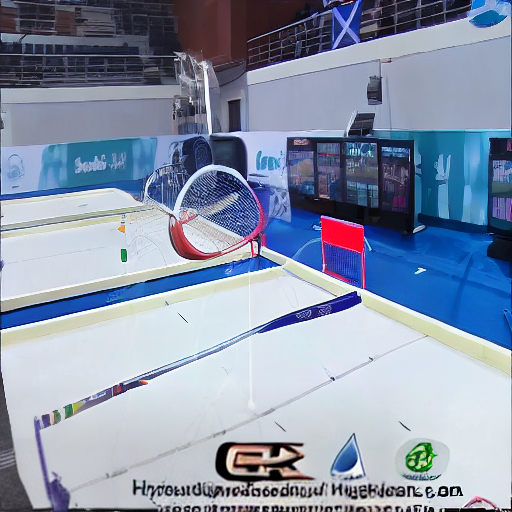

In [14]:
prompt = "high definition, sports equipment, sports feild or track"
generator = torch.Generator(device="mps")

result_img = pipe(
    prompt = prompt,
    image = img,
    mask_image = real_mask,
    num_inference_steps=50,
    generator=generator).images[0]

result_img

## Image Captioning

In [1]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

from matplotlib import pyplot as plt

In [2]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [39]:
category = 'fishing and hunting'

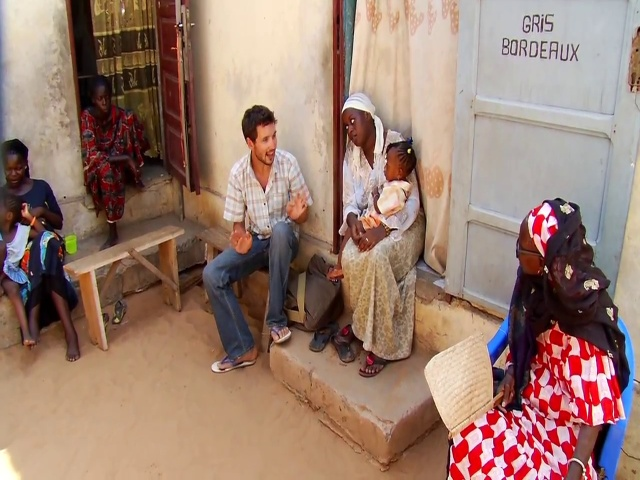

In [78]:
image_path = f'../Project2_Analysis_V_1.6/data/processed/images/092700097.jpg'
result_img = Image.open(image_path)
result_img

In [ ]:
prompt_dict = {
    "005808361.jpg": "high definition, realistic, curling playground, sports equipment",
    "025107902.jpg": "high definition, realistic, skating rink, skating equipment",
    "065313577.jpg": "high definition, realistic, soccer playground",
    "070807258.jpg": "high definition, realistic, ice hockey playground",
    "071324479.jpg": "high definition, realistic, golf playground, golf equipment"   
}

In [79]:
# unconditional image captioning
inputs = processor(result_img, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

a group of people sitting on a bench


## Image2Image

In [98]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline

In [99]:
pipe2 = StableDiffusionImg2ImgPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float32)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [100]:
pipe2.enable_attention_slicing()
pipe2.enable_vae_slicing()
pipe2.enable_vae_tiling()

In [101]:
pipe2 = pipe2.to("mps")

In [102]:
prompt, result_img.size

('high definition, sports equipment, sports feild or track', (512, 512))

In [ ]:
generator2 = torch.Generator(device = "mps")
img = pipe2(prompt = prompt, image = result_img, strength=0.7, generator = generator2).images[0]

  0%|          | 0/35 [00:00<?, ?it/s]

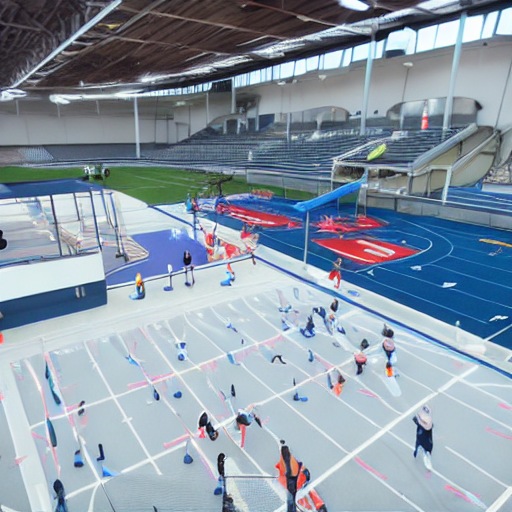

In [ ]:
img

In [82]:
prompt = "high definition, realisitic, sports equipment, sports track"
neg_prompt = "human"

In [ ]:
generator2 = torch.Generator(device = "mps")
img = pipe2(prompt = prompt, negative_prompt=neg_prompt, num_inference_steps=80, image = result_img, strength=0.60, generator = generator2).images[0]

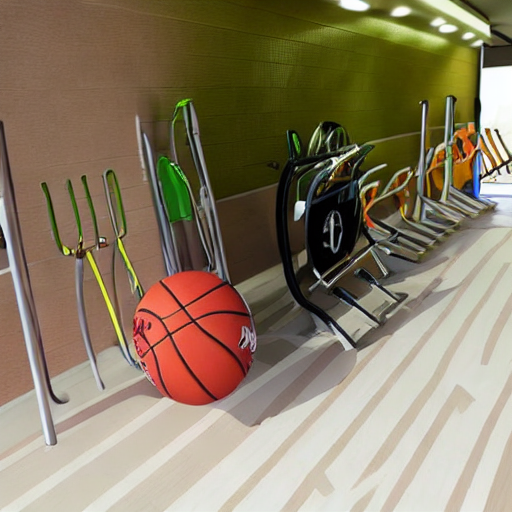

In [70]:
img

In [84]:
generator2 = torch.Generator(device = "mps")
img = pipe2(prompt = prompt, negative_prompt=neg_prompt, image = result_img, strength=0.60, generator = generator2).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

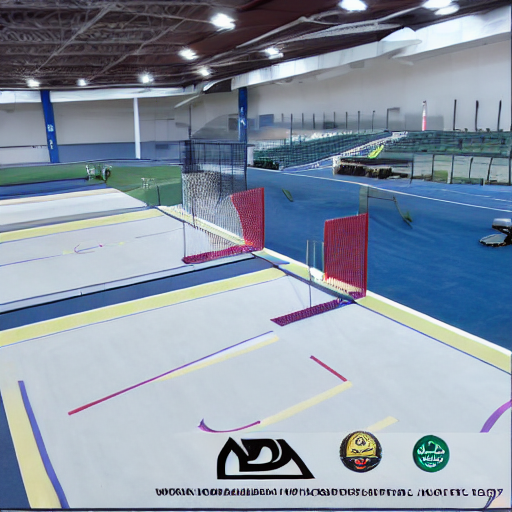

In [85]:
img

In [103]:
generator2 = torch.Generator(device = "mps")
img = pipe2(prompt = prompt, negative_prompt=neg_prompt, image = result_img, strength=0.60, generator = generator2).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

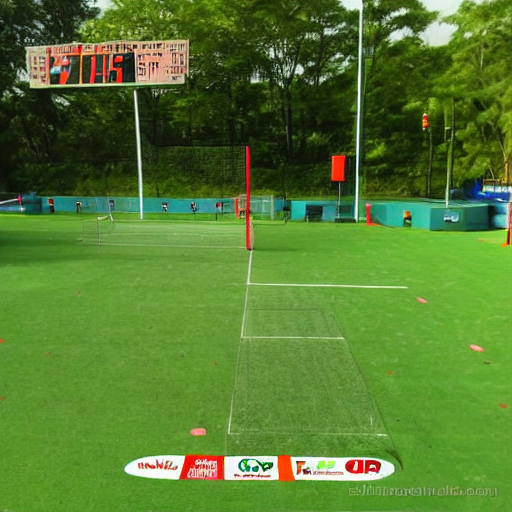

In [104]:
img